=== Summary of Driving License Ownership (Mean by Group & Gender) ===
  group gender   license
0     A    men  0.666667
1     A  women  0.333333
2     B    men  0.250000
3     B  women  1.000000


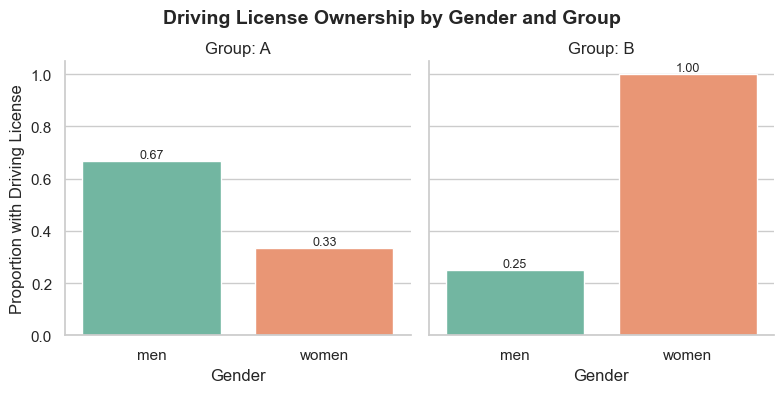

In [3]:
# ============================================================
# Visualization of Driving License Data by Gender and Group
# Author: Phạm Thanh Long - B22DCCN505
# Description:
#     This program loads demographic data about driving license
#     ownership and visualizes it using seaborn's categorical plots.
#     Additional features are included:
#         (1) Data cleaning for gender labels
#         (2) Summary statistics printed in tabular form
#         (3) Annotated bar plots with values
#         (4) Custom color palette for readability
#         (5) Export of the final figure to PNG file
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# Step 1: Load dataset
# ------------------------------------------------------------
data = pd.read_csv('drivinglicense.csv')

# Optional: standardize gender values
data['gender'] = data['gender'].replace({
    'M': 'Men',
    'F': 'Women',
    'male': 'Men',
    'female': 'Women'
})

# ------------------------------------------------------------
# Step 2: Summary statistics
# ------------------------------------------------------------
summary = data.groupby(['group', 'gender'])['license'].mean().reset_index()
print("=== Summary of Driving License Ownership (Mean by Group & Gender) ===")
print(summary)

# ------------------------------------------------------------
# Step 3: Create categorical bar plots
# ------------------------------------------------------------
sns.set_theme(style="whitegrid")  # clean academic style

g = sns.catplot(
    x="gender",
    y="license",
    hue="gender",        # thêm hue để ánh xạ màu theo gender
    col="group",
    data=data,
    kind="bar",
    errorbar=None,
    aspect=1.0,
    height=4,
    palette="Set2",
    legend=False         # tắt legend vì đã hiển thị gender ở trục X
)


# ------------------------------------------------------------
# Step 4: Customize labels and titles
# ------------------------------------------------------------
g.set_axis_labels("Gender", "Proportion with Driving License")
g.set_titles("Group: {col_name}")

# Add main title
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Driving License Ownership by Gender and Group", 
               fontsize=14, weight="bold")

# ------------------------------------------------------------
# Step 5: Add annotations (numerical labels on top of bars)
# ------------------------------------------------------------
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.2f}",    # format with 2 decimals
            ha="center", va="bottom", fontsize=9
        )

# ------------------------------------------------------------
# Step 6: Save figure
# ------------------------------------------------------------
g.savefig("driving_license_by_gender_group.png", dpi=300)

# ------------------------------------------------------------
# Step 7: Show the plot
# ------------------------------------------------------------
plt.show()



